## Import Libraries and Files

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Import Files
bike = pd.read_pickle(r'../Data/Prepared/bike_flag.pkl')

## Visualisations

In [4]:
# Define theme
sns.set_theme(style='white', palette='Greens_r')

In [3]:
# Define top 20 starting stations
top = bike.groupby('start_station')['ride_id'].count().reset_index()

In [4]:
top20 = top.nlargest(20, 'ride_id')

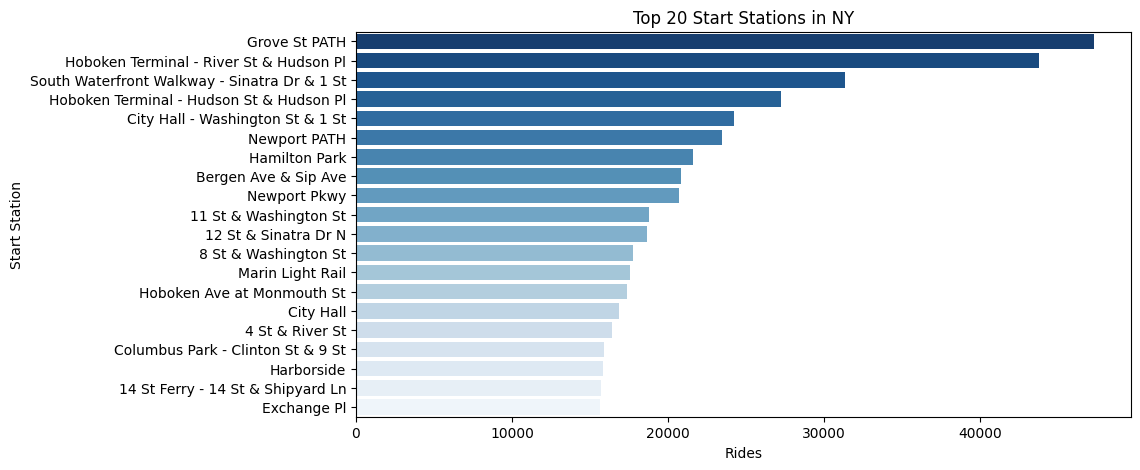

In [5]:
# Plot Bar Chart
plt.figure(figsize=(10,5)) 
with sns.color_palette(palette='Blues_r', n_colors=len(top20)):
    sns.barplot(data=top20, x='ride_id', y='start_station', hue='start_station', palette=sns.color_palette(palette='Blues_r', n_colors=len(top20)))
plt.title('Top 20 Start Stations in NY') # Set title
plt.xlabel('Rides') # Set x label
plt.ylabel('Start Station') # Set y label
# Show plot
plt.show()

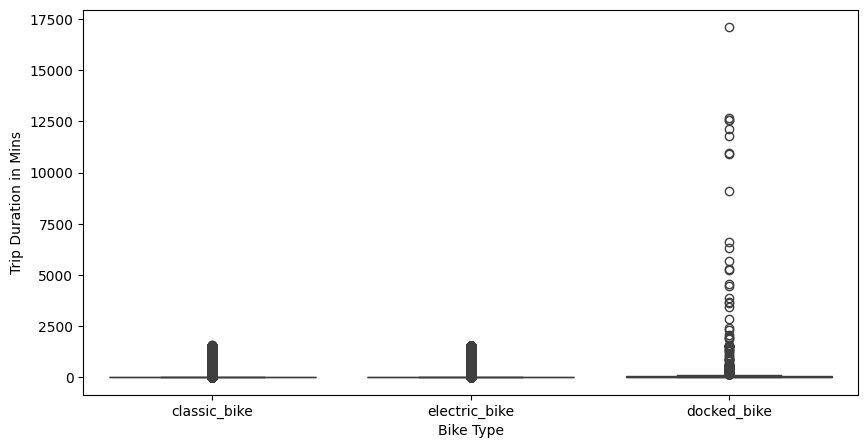

In [6]:
# Plot bike type with Box Plot
plt.figure(figsize=(10, 5)) # Set figure
sns.boxplot(data=bike, x='bike_type', y='trip_mins')
plt.xlabel('Bike Type') # Set x label
plt.ylabel('Trip Duration in Mins') # Set y label
# Show plot
plt.show()

In [8]:
bike['bike_type'].value_counts()

bike_type
classic_bike     854072
electric_bike    132573
docked_bike        2152
Name: count, dtype: int64

This boxplot compares the distribution of trip durations (in minutes) for three types of bikes: classic bikes, electric bikes, and docked bikes. Most trip durations across all bike types are tightly clustered near the lower end, as indicated by the short whiskers and dense presence of data near the bottom of the y-axis. However, there are significant outliers for docked bikes, with trip durations extending up to over 25,000 minutes, suggesting occasional anomalies or errors in trip recording for this category or maybe technical issues with the docks. Classic and electric bikes show a more consistent range of trip durations with fewer extreme values. 

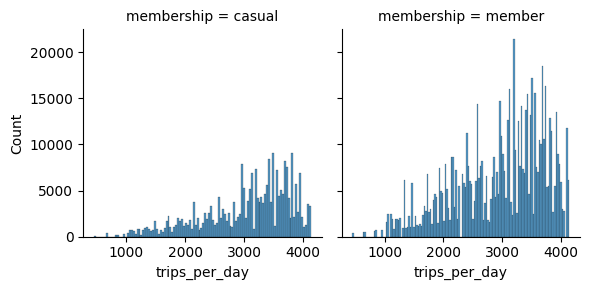

In [7]:
# Define an explicit order if `trip_mins` is categorical
grid = sns.FacetGrid(bike, col='membership')
grid.map(sns.histplot, 'trips_per_day')
plt.show()

This histograms show the distribution of trips per day for two membership types: members and casual users. Members tend to have a higher count of trips overall, as indicated by the larger frequency values across all bins, while casual users show lower counts. The use of FacetGrids helps separate the analysis by membership type, making it easier to compare usage patterns and identify distinct trends within each group without overlapping distributions.